**THEORY QUESTIONS**

1. What is Logistic Regression, and how does it differ from Linear Regression?

Logistic Regression is a classification algorithm used to predict categorical outcomes (e.g., spam vs. not spam).

Linear Regression is used for regression tasks, predicting continuous values.
The key difference: Logistic Regression applies the sigmoid function to map outputs between 0 and 1, making it suitable for classification.

2. What is the mathematical equation of Logistic Regression?
Logistic Regression predicts the probability P(Y=1∣X) that an instance belongs to the positive class. It is based on the logistic (sigmoid) function:
P(Y=1∣X)= 1/
1+e
−(w
0
​
 +w
1
​
 X
1
​
 +w
2
​
 X
2
​
 +...+w
n
​
 X
n
​
 )


Here,

w
0
​
  is the intercept (bias),

w
1
​
 ,w
2
​
 ,...,w
n
​
  are the weights (coefficients) of the features,

X
1
​
 ,X
2
​
 ,...,X
n
​
  are the feature values,

e is the Euler’s number (~2.718),

The function outputs a probability between 0 and 1.

The decision rule is:

If P(Y=1∣X)≥0.5, classify as positive (1).

Otherwise, classify as negative (0).

3. Why do we use the Sigmoid function in Logistic Regression?

The Sigmoid function is used because:

It converts any real-valued input into a probability range (0 to 1).

It helps interpret the output as a probability for binary classification.

It is differentiable, making it useful for optimization using gradient descent.

4. What is the cost function used in Logistic Regression?

Logistic Regression uses the Log Loss (Binary Cross-Entropy) Cost Function:

𝐽
(
𝑤
)
=
−
1/
𝑚
∑(i=1 to m)
[
𝑦
𝑖
log
⁡
(
𝑦
^
𝑖
)
+
(
1
−
𝑦
𝑖
)
log
⁡
(
1
−
𝑦
^
𝑖
)
]

Where:
h
θ
​
 (x) is the predicted probability.

𝑦
𝑖
  is the actual class label (0 or 1).

m is the number of samples.


5. What is Regularization in Logistic Regression? Why is it needed?

Regularization prevents overfitting by adding a penalty term to the cost function:

L1 (Lasso) Regularization: Adds absolute value of weights ∣β∣, leading to
                           feature selection.

L2 (Ridge) Regularization: Adds squared weights β^2, reducing large
                           coefficients.
                           
It is needed to avoid overfitting and improve generalization.


6. Explain the difference between Lasso, Ridge, and Elastic Net regression.

Lasso (L1): Shrinks some coefficients to zero, effectively performing feature selection.

Ridge (L2): Reduces all coefficients but does not make them zero.

Elastic Net: A combination of L1 + L2, balancing both feature selection and weight shrinking.

7. When should we use Elastic Net instead of Lasso or Ridge?

Use Elastic Net when:

There are highly correlated features (it handles them better than Lasso).

The dataset has many irrelevant features (it selects features while preventing too much sparsity).

8. What is the impact of the regularization parameter (λ) in Logistic Regression?

Higher λ (stronger regularization) → More shrinkage of coefficients, reducing overfitting.

Lower λ (weaker regularization) → Allows more flexibility but may lead to overfitting.


9. What are the key assumptions of Logistic Regression?

Linearity of independent variables with log-odds.

No multicollinearity (high correlation between independent variables is undesirable).

No extreme outliers in independent variables.

Large enough sample size to ensure statistical reliability.


10. What are some alternatives to Logistic Regression for classification tasks?

Decision Trees

Random Forest

Support Vector Machines (SVM)

Naïve Bayes

Neural Networks

11. What are Classification Evaluation Metrics?

Accuracy – Overall correctness of predictions.

Precision – How many predicted positives are actually positive.

Recall (Sensitivity) – How many actual positives were correctly predicted.

F1-Score – Harmonic mean of precision & recall.

ROC-AUC Score – Evaluates model discrimination between classes.


12. How does class imbalance affect Logistic Regression?

Logistic Regression assumes equal class distribution, leading to biased predictions.

Solutions:
Use weighted loss functions (give more weight to minority class).
Resampling techniques (oversampling the minority or undersampling the majority class).

Use different algorithms like Random Forest or SMOTE for balancing.

13. What is Hyperparameter Tuning in Logistic Regression?

It involves selecting the best hyperparameters, such as:

Regularization strength (λ)

Choice of solver (e.g., 'liblinear', 'saga')

Methods:

Grid Search (exhaustive search over parameters).

Random Search (randomly selects parameters for efficiency).

14. What are different solvers in Logistic Regression? Which one should be used?

liblinear – Best for small datasets, works well with L1/L2 penalties.

lbfgs – Good for multi-class classification (default in Scikit-Learn).

sag – Good for large datasets.

saga – Supports L1/L2, works well for large-scale problems.


15. How is Logistic Regression extended for multiclass classification?

Two main approaches:

One-vs-Rest (OvR): Trains one classifier per class vs. all others.

Softmax (Multinomial Regression): Directly predicts probabilities for all classes using a generalization of the sigmoid function.


16. What are the advantages and disadvantages of Logistic Regression?

Advantages:

Simple and interpretable.

Works well when features are linearly separable.

Fast training and inference.


Disadvantages:

Assumes linear decision boundaries.

Sensitive to outliers.

May not perform well with high-dimensional or complex data.


17. What are some use cases of Logistic Regression?

Medical Diagnosis (e.g., predicting heart disease).

Spam Email Detection.

Customer Churn Prediction.

Credit Risk Assessment.


18. What is the difference between Softmax Regression and Logistic Regression?

Logistic Regression is used for binary classification (0 or 1).

Softmax Regression is used for multi-class classification by predicting probabilities for multiple classes.

19. How do we choose between One-vs-Rest (OvR) and Softmax for multiclass classification?

Use OvR when classes are imbalanced or when training efficiency matters.

Use Softmax when classes are balanced and interpretability is important.


20. How do we interpret coefficients in Logistic Regression?

Each coefficient
βi
​ represents how a unit change in
Xi
  affects the log-odds of the positive class.

The odds ratio can be calculated as:

If e^(𝛽i) > 1 → Feature increases probability of positive class.

If e^(𝛽i) < 1 -> Feature decreases probability of positive class.


**PRACTICAL QUESTIONS**

In [1]:
# 1. Write a Python program that loads a dataset, splits it into training and testing sets, applies Logistic
#     Regression, and prints the model accuracy.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris
data = load_iris()
data

df =  pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target
df = df[df['target'] != 2]

x = df.iloc[:,:-1]
y = df.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 1)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy is : ", accuracy)

Accuracy is :  1.0


In [2]:
# 2. Write a Python program to apply L1 regularization (Lasso) on a dataset using LogisticRegression(penalty='l1')
#    and print the model accuracy.
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)

classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with L1 regularization (Lasso) is:", accuracy)

Accuracy with L1 regularization (Lasso) is: 1.0


In [3]:
# 3. Write a Python program to train Logistic Regression with L2 regularization (Ridge) using
# LogisticRegression(penalty='l2'). Print model accuracy and coefficients
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty='l2', max_iter=1000)

classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with L2 regularization (Ridge) is:", accuracy)

coefficients = classifier.coef_
print("Coefficients of the model:")
print(coefficients)

Accuracy with L2 regularization (Ridge) is: 1.0
Coefficients of the model:
[[ 0.46100411 -0.78836575  2.18624929  0.92865666]]


In [4]:
# 4. Write a Python program to train Logistic Regression with Elastic Net Regularization (penalty='elasticnet').
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=1000)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with Elastic Net regularization is:", accuracy)

coefficients = classifier.coef_
print("Coefficients of the model:")
print(coefficients)


Accuracy with Elastic Net regularization is: 1.0
Coefficients of the model:
[[ 0.         -0.9168213   2.49726757  0.5870102 ]]


In [5]:
# 5. Write a Python program to train a Logistic Regression model for multiclass classification using
# multi_class='ovr'

classifier = LogisticRegression(multi_class='ovr', max_iter=1000)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for multiclass classification (OvR) is:", accuracy)

Accuracy for multiclass classification (OvR) is: 1.0


In [6]:
# 6."Write a Python program to apply GridSearchCV to tune the hyperparameters (C and penalty) of Logistic
#      Regression. Print the best parameters and accuracy.

from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

classifier = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy from GridSearchCV:", best_accuracy)

y_pred = grid_search.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy with Best Parameters:", test_accuracy)

Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best Accuracy from GridSearchCV: 1.0
Test Accuracy with Best Parameters: 1.0


In [7]:
# 7. Write a Python program to evaluate Logistic Regression using Stratified K-Fold Cross-Validation. Print the
#    average accuracy.
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
classifier = LogisticRegression(max_iter=1000)
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

cv_scores = cross_val_score(classifier, x, y, cv=stratified_kfold, scoring='accuracy')

average_accuracy = cv_scores.mean()
print("Average Accuracy from Stratified K-Fold Cross-Validation:", average_accuracy)

Average Accuracy from Stratified K-Fold Cross-Validation: 1.0


In [8]:
# 9. Write a Python program to apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) in
# Logistic Regression. Print the best parameters and accuracy.

from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'C': uniform(0.01, 100),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

classifier = LogisticRegression(max_iter=1000)
random_search = RandomizedSearchCV(classifier, param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=1)
random_search.fit(x_train, y_train)

best_params = random_search.best_params_
best_accuracy = random_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy from RandomizedSearchCV:", best_accuracy)

y_pred = random_search.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy with Best Parameters:", test_accuracy)

Best Parameters: {'C': 41.7122004702574, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy from RandomizedSearchCV: 1.0
Test Accuracy with Best Parameters: 1.0


In [9]:
# 10. Write a Python program to implement One-vs-One (OvO) Multiclass Logistic Regression and print accuracy.
classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for One-vs-One (OvO) Multiclass Logistic Regression is:", accuracy)

Accuracy for One-vs-One (OvO) Multiclass Logistic Regression is: 1.0


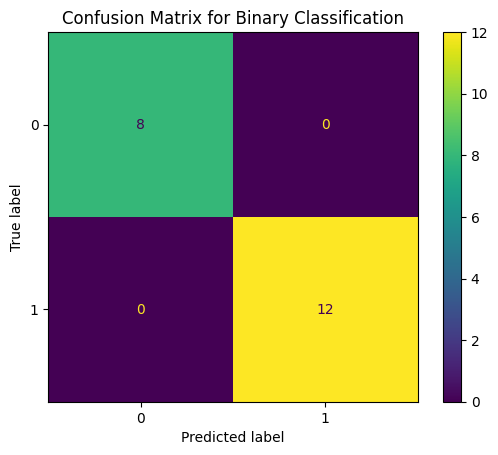

In [10]:
# 11. Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary
#      classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

classifier = LogisticRegression(max_iter=1000)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix for Binary Classification")
plt.show()

In [11]:
# 12. Write a Python program to train a Logistic Regression model and evaluate its performance using Precision,
#     Recall, and F1-Score.
from sklearn.metrics import precision_score, recall_score, f1_score
classifier = LogisticRegression(max_iter=1000)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 1.0
Recall: 1.0
F1-Score: 1.0


In [12]:
# 13. Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to
#      improve model performance

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with Class Weights:", accuracy)

Accuracy with Class Weights: 1.0


In [13]:
# 14. Write a Python program to train Logistic Regression on the Titanic dataset, handle missing values, and
# evaluate performance
from sklearn.impute import SimpleImputer

df = pd.read_csv('titanic.csv')

df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])

x = df.drop('Survived', axis=1)
y = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

classifier = LogisticRegression(max_iter=1000)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Titanic Dataset:", accuracy)

Accuracy with Class Weights: 1.0


In [15]:
# 15. Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression
#      model. Evaluate its accuracy and compare results with and without scaling.

from sklearn.preprocessing import StandardScaler
classifier = LogisticRegression(max_iter=1000)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)
accuracy_without_scaling = accuracy_score(y_test, y_pred)
print("Accuracy without Feature Scaling:", accuracy_without_scaling)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

classifier_scaled = LogisticRegression(max_iter=1000)
classifier_scaled.fit(x_train_scaled, y_train)

y_pred_scaled = classifier_scaled.predict(x_test_scaled)
accuracy_with_scaling = accuracy_score(y_test, y_pred_scaled)
print("Accuracy with Feature Scaling:", accuracy_with_scaling)

if accuracy_with_scaling > accuracy_without_scaling:
    print("Feature Scaling improved accuracy.")
elif accuracy_with_scaling < accuracy_without_scaling:
    print("Feature Scaling reduced accuracy.")
else:
    print("Feature Scaling did not change accuracy.")

Accuracy without Feature Scaling: 1.0
Accuracy with Feature Scaling: 1.0
Feature Scaling did not change accuracy.


In [16]:
# 16. Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC score.

from sklearn.metrics import roc_auc_score

y_pred_proba = classifier.predict_proba(x_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 1.0


In [17]:
# 17.  Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate accuracy.
from sklearn.metrics import accuracy_score
classifier = LogisticRegression(C=0.5, max_iter=1000)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with Custom Learning Rate (C=0.5):", accuracy)


Accuracy with Custom Learning Rate (C=0.5): 1.0


In [18]:
# 18. Write a Python program to train Logistic Regression and identify important features based on model coefficients.
classifier = LogisticRegression(max_iter=1000)
classifier.fit(x_train, y_train)

coefficients = classifier.coef_[0]
feature_importance = pd.DataFrame({'Feature': x.columns, 'Coefficient': coefficients})
print("Feature Importance:")
print(feature_importance)

Feature Importance:
             Feature  Coefficient
0  sepal length (cm)     0.461004
1   sepal width (cm)    -0.788366
2  petal length (cm)     2.186249
3   petal width (cm)     0.928657


In [19]:
# 19. Write a Python program to train Logistic Regression and evaluate its performance using Cohen’s Kappa Score.
from sklearn.metrics import cohen_kappa_score
classifier = LogisticRegression(max_iter=1000)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

kappa = cohen_kappa_score(y_test, y_pred)
print("Cohen’s Kappa Score:", kappa)

Cohen’s Kappa Score: 1.0


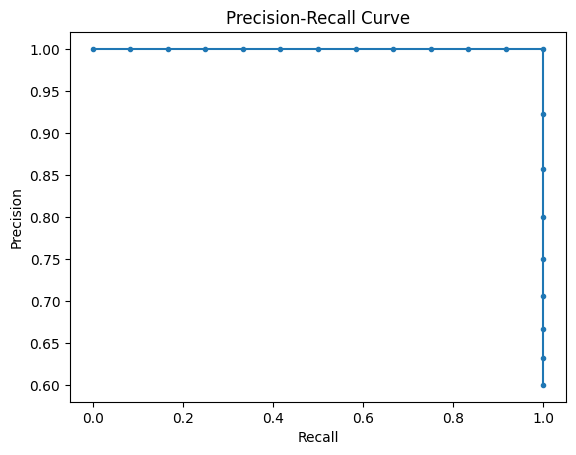

In [21]:
# 20. Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary classification.

from sklearn.metrics import precision_recall_curve
classifier = LogisticRegression(max_iter=1000)
classifier.fit(x_train, y_train)

y_pred_proba = classifier.predict_proba(x_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [22]:
# 21. Write a Python program to train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare their accuracy.

solvers = ['liblinear', 'saga', 'lbfgs']
for solver in solvers:
    classifier = LogisticRegression(solver=solver, max_iter=1000)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with {solver} solver: {accuracy}")

Accuracy with liblinear solver: 1.0
Accuracy with saga solver: 1.0
Accuracy with lbfgs solver: 1.0


In [23]:
# 22. Write a Python program to train Logistic Regression and evaluate its performance using Matthews
# Correlation Coefficient (MCC).
from sklearn.metrics import matthews_corrcoef
classifier = LogisticRegression(max_iter=1000)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)
mcc = matthews_corrcoef(y_test, y_pred)
print("Matthews Correlation Coefficient (MCC):", mcc)

Matthews Correlation Coefficient (MCC): 1.0


In [24]:
# 23. Write a Python program to train Logistic Regression on both raw and standardized data. Compare their
#      accuracy to see the impact of feature scaling.

classifier = LogisticRegression(max_iter=1000)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)
accuracy_raw = accuracy_score(y_test, y_pred)
print("Accuracy on Raw Data:", accuracy_raw)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

classifier_scaled = LogisticRegression(max_iter=1000)
classifier_scaled.fit(x_train_scaled, y_train)

y_pred_scaled = classifier_scaled.predict(x_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print("Accuracy on Standardized Data:", accuracy_scaled)

Accuracy on Raw Data: 1.0
Accuracy on Standardized Data: 1.0


In [25]:
# 24. Write a Python program to train Logistic Regression and find the optimal C (regularization strength) using
#      cross-validation.
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
classifier = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

best_C = grid_search.best_params_['C']
print("Optimal C (Regularization Strength):", best_C)

Optimal C (Regularization Strength): 0.1


In [28]:
# 25. Write a Python program to train Logistic Regression, save the trained model using joblib, and load it again to
# make predictions.
import joblib
classifier = LogisticRegression(max_iter=1000)
classifier.fit(x_train, y_train)

joblib.dump(classifier, 'logistic_regression_model.pkl')

loaded_model = joblib.load('logistic_regression_model.pkl')
y_pred = loaded_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Loaded Model:", accuracy)

Accuracy of Loaded Model: 1.0
